# Week 9

# Agenda

-   Auto Diff

-   Logistic Regression With Torch

-   Classification With NN

#### Packages we will require this week

# Recap: Gradient Descent

In [ ]:
x <- cars$speed
y <- cars$dist

# define the loss function

Loss <- function(b, x, y){
    squares <- (y - b[1] - b[2] * x)^2
    return( mean(squares) )
}

b <- rnorm(2)
Loss(b, cars$speed, cars$dist)

[1] 6720.606

[1]  -148.8356 -2615.6818

Iteration: 1     Loss value: 2266.69206282505
Iteration: 2     Loss value: 2059.23910669385
Iteration: 3     Loss value: 1873.22918303142
Iteration: 4     Loss value: 1706.44585378999
Iteration: 5     Loss value: 1556.90178087543
Iteration: 6     Loss value: 1422.8150454474
Iteration: 7     Loss value: 1302.58791495726
Iteration: 8     Loss value: 1194.78780492464
Iteration: 9     Loss value: 1098.13020855637
Iteration: 10    Loss value: 1011.46339084899
Iteration: 1000  Loss value: 258.3737211186
Iteration: 2000  Loss value: 257.107595890431
Iteration: 3000  Loss value: 255.892681655609
Iteration: 4000  Loss value: 254.726907082071
Iteration: 5000  Loss value: 253.608284616897
Iteration: 6000  Loss value: 252.534907097769
Iteration: 7000  Loss value: 251.504944501431
Iteration: 8000  Loss value: 250.516640823577
Iteration: 9000  Loss value: 249.568311085104

# Auto Diff

## Automatic differentiation

The cornerstone of modern machine learning and data-science is to be
able to perform **automatic differentiation**, i.e., being able to
compute the gradients for **any** function without the need to solve
tedious calculus problems. For the more advanced parts of the course
(e.g., neural networks), we will be using automatic differentiation
libraries to perform gradient descent.

While there are several libraries for performing these tasks, we will be
using the `pyTorch` library for this. The installation procedure can be
found
[here](https://cran.r-project.org/web/packages/torch/vignettes/installation.html)

The basic steps are:

``` r
renv::install("torch")
library(torch)
torch::install_torch()
```

------------------------------------------------------------------------

### Example 1:

In [ ]:
x <- torch_randn(c(5, 1), requires_grad=TRUE)
x

torch_tensor
-0.2829
-0.7400
-0.5383
 0.4498
 1.3757
[ CPUFloatType{5,1} ][ requires_grad = TRUE ]

sqrt(sum(as_array(x)<sup>2)</sup>10)

In [ ]:
f <- function(x){
    torch_norm(x)^10
}

y <- f(x)
y

torch_tensor
248.029
[ CPUFloatType{} ][ grad_fn = <PowBackward0> ]

$$
\frac{dy}{dx}
$$

In [ ]:
x$grad

torch_tensor
 -232.9504
 -609.3283
 -443.2313
  370.3994
 1132.7133
[ CPUFloatType{5,1} ]

In [ ]:
(5 * torch_norm(x)^8) * (2 * x)

torch_tensor
 -232.9504
 -609.3283
 -443.2313
  370.3994
 1132.7133
[ CPUFloatType{5,1} ][ grad_fn = <MulBackward0> ]

------------------------------------------------------------------------

### Example 2:

In [ ]:
x <- torch_randn(c(10, 1), requires_grad=T)
y <- torch_randn(c(10, 1), requires_grad=T)

c(x, y)

[[1]]
torch_tensor
-1.6692
 0.1277
-0.3249
 0.9033
 1.8200
-0.5604
 1.3179
 0.0830
-1.2663
 0.3096
[ CPUFloatType{10,1} ][ requires_grad = TRUE ]

[[2]]
torch_tensor
 0.8909
-2.5727
 2.3232
-0.8436
 1.7008
 0.0622
-0.2688
-1.6360
-1.6365
 1.6469
[ CPUFloatType{10,1} ][ requires_grad = TRUE ]

In [ ]:
f <- function(x, y){
    sum(x * y)
}

z <- f(x, y)
z

torch_tensor
1.82021
[ CPUFloatType{} ][ grad_fn = <SumBackward0> ]

In [ ]:
c(x$grad, y$grad)

[[1]]
torch_tensor
 0.8909
-2.5727
 2.3232
-0.8436
 1.7008
 0.0622
-0.2688
-1.6360
-1.6365
 1.6469
[ CPUFloatType{10,1} ]

[[2]]
torch_tensor
-1.6692
 0.1277
-0.3249
 0.9033
 1.8200
-0.5604
 1.3179
 0.0830
-1.2663
 0.3096
[ CPUFloatType{10,1} ]

In [ ]:
c(x - y$grad, y - x$grad)

[[1]]
torch_tensor
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
[ CPUFloatType{10,1} ][ grad_fn = <SubBackward0> ]

[[2]]
torch_tensor
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
[ CPUFloatType{10,1} ][ grad_fn = <SubBackward0> ]

------------------------------------------------------------------------

### Example 3:

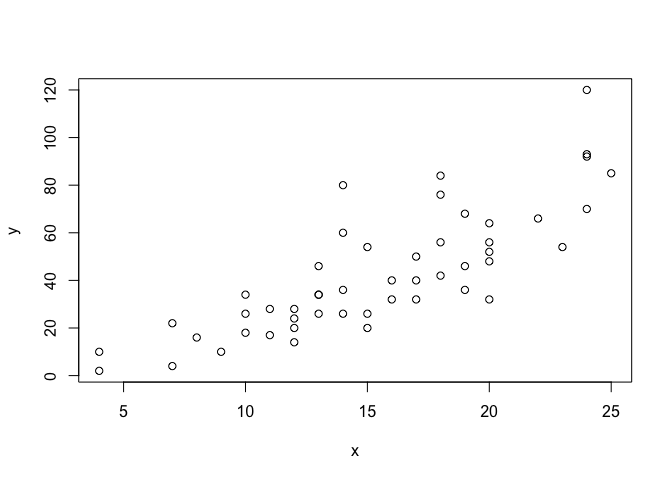

In [ ]:
x <- torch_tensor(cars$speed, dtype = torch_float())
y <- torch_tensor(cars$dist, dtype = torch_float())

plot(x, y)

In [ ]:
b <- torch_zeros(c(2,1), dtype=torch_float(), requires_grad = TRUE)
b

torch_tensor
 0
 0
[ CPUFloatType{2,1} ][ requires_grad = TRUE ]

In [ ]:
loss <- nn_mse_loss()

In [ ]:
b <- torch_zeros(c(2,1), dtype=torch_float(), requires_grad = TRUE) # Initializing variables
steps <- 10000 # Specifying the number of optimization steps
L <- rep(Inf, steps) # Keeping track of the loss


eta <- 0.5 # Specifying the learning rate and the optimizer
optimizer <- optim_adam(b, lr=eta)


# Gradient descent optimization over here
for (i in 1:steps){
    y_hat <- x * b[2] + b[1]
    l <- loss(y_hat, y)
    
    L[i] <- l$item()
    optimizer$zero_grad()
    l$backward()
    optimizer$step()
    
    if(i %in% c(1:10) || i %% 200 == 0){
        cat(sprintf("Iteration: %s\t Loss value: %s\n", i, L[i]))
    }
}

Iteration: 1     Loss value: 2498.06005859375
Iteration: 2     Loss value: 1759.53002929688
Iteration: 3     Loss value: 1174.45300292969
Iteration: 4     Loss value: 742.353759765625
Iteration: 5     Loss value: 457.703643798828
Iteration: 6     Loss value: 307.684936523438
Iteration: 7     Loss value: 270.263397216797
Iteration: 8     Loss value: 314.067993164062
Iteration: 9     Loss value: 401.761566162109
Iteration: 10    Loss value: 496.908325195312
Iteration: 200   Loss value: 231.474166870117
Iteration: 400   Loss value: 227.114730834961
Iteration: 600   Loss value: 227.070495605469
Iteration: 800   Loss value: 227.070404052734
Iteration: 1000  Loss value: 227.070404052734
Iteration: 1200  Loss value: 227.070404052734
Iteration: 1400  Loss value: 227.070404052734
Iteration: 1600  Loss value: 227.070404052734
Iteration: 1800  Loss value: 227.070404052734
Iteration: 2000  Loss value: 227.070404052734
Iteration: 2200  Loss value: 227.070404052734
Iteration: 2400  Loss value: 227.0

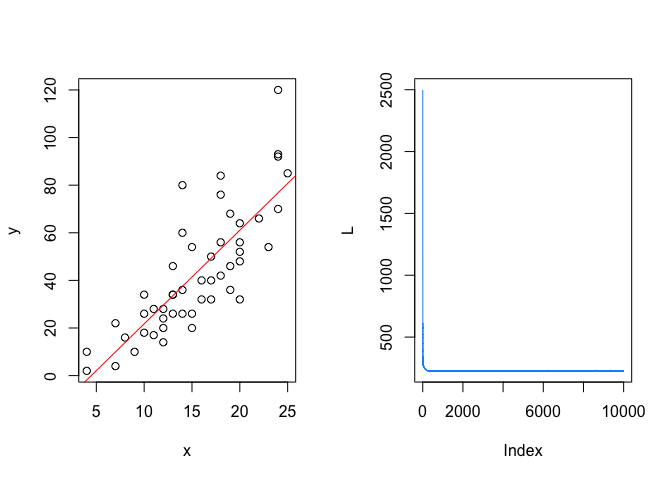

In [ ]:
options(repr.plot.width=12, repr.plot.height=7)

par(mfrow=c(1, 2))

plot(x, y)
abline(as_array(b), col="red")

plot(L, type="l", col="dodgerblue")

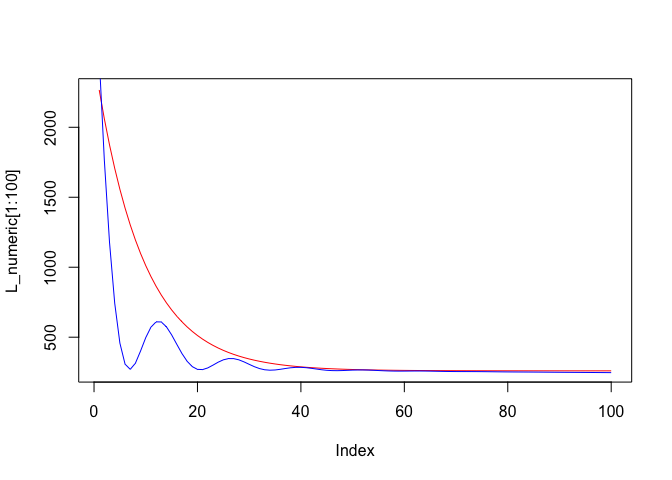

In [ ]:
plot(L_numeric[1:100], type="l", col="red")
lines(L[1:100], col="blue")